In [12]:
#Импортирование необходимых библиотек для построения и оценки работоспособности модели
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression, Lasso

from sklearn import preprocessing, pipeline, impute, compose
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score, confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')
sns.set()


In [13]:
#Набор данных для обучения модели
train_data = pd.read_csv('train_churn.csv', index_col=0)
train_data.drop(train_data.index[10000:], axis=0, inplace=True)
print(train_data.shape)
train_data.head(5)

(10000, 231)


,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,target
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN,-1


In [14]:
#Набор данных для тестирования модели
test_data = pd.read_csv('test_churn.csv', index_col=0)
test_data.index = range(10000)
test_data.drop(test_data.index[5000:], axis=0, inplace=True)
print(test_data.shape)
test_data.head(5)

(5000, 231)


,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,target
0,NaN,NaN,NaN,NaN,NaN,651.0,7.0,NaN,NaN,NaN,...,ZNT3hLU,LM8l689qOp,NaN,ELof,453m,02N6s8f,F2FcTt7IdMT_v,mj86,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1442.0,0.0,NaN,NaN,NaN,...,Vo68gbh,NaN,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,595.0,14.0,NaN,NaN,NaN,...,3ykshbG,LM8l689qOp,NaN,kG3k,WqMG,RAYp,55YFVY9,am7c,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1323.0,7.0,NaN,NaN,NaN,...,kqrML05,LM8l689qOp,NaN,xG3x,Qu4f,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
4,NaN,NaN,NaN,NaN,NaN,588.0,7.0,NaN,NaN,NaN,...,MnYAKIt,LM8l689qOp,NaN,ELof,fKCe,RAYp,55YFVY9,NaN,NaN,-1


In [15]:
#Объединение надоров данных
full_dataset = pd.concat([test_data, train_data], axis=0)
full_dataset

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,target
0,NaN,NaN,NaN,NaN,NaN,651.0,7.0,NaN,NaN,NaN,...,ZNT3hLU,LM8l689qOp,NaN,ELof,453m,02N6s8f,F2FcTt7IdMT_v,mj86,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1442.0,0.0,NaN,NaN,NaN,...,Vo68gbh,NaN,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,595.0,14.0,NaN,NaN,NaN,...,3ykshbG,LM8l689qOp,NaN,kG3k,WqMG,RAYp,55YFVY9,am7c,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1323.0,7.0,NaN,NaN,NaN,...,kqrML05,LM8l689qOp,NaN,xG3x,Qu4f,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
4,NaN,NaN,NaN,NaN,NaN,588.0,7.0,NaN,NaN,NaN,...,MnYAKIt,LM8l689qOp,NaN,ELof,fKCe,RAYp,55YFVY9,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,3304.0,14.0,NaN,NaN,NaN,...,WfsWw2A,LM8l689qOp,NaN,xG3x,7aLG,ZI9m,iyHGyLCEkQ,am7c,NaN,-1
9996,NaN,NaN,NaN,NaN,NaN,252.0,7.0,NaN,NaN,NaN,...,xKQ2fT4,LM8l689qOp,NaN,xG3x,Qu4f,RAYp,F2FyR07IdsN7I,NaN,NaN,1
9997,NaN,NaN,NaN,NaN,NaN,280.0,0.0,NaN,NaN,NaN,...,hThoIp0,LM8l689qOp,NaN,NaN,7P5s,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
9998,NaN,NaN,NaN,NaN,NaN,11879.0,7.0,NaN,NaN,NaN,...,Esw8PEb,LM8l689qOp,NaN,kG3k,Aoh3,RAYp,F2FyR07IdsN7I,mj86,NaN,-1


In [16]:
#Определение процента оттока и не оттока клиентов
target_values = full_dataset['target']
left = round(target_values.value_counts(normalize=True)[1]*100,2)
not_left = round(target_values.value_counts(normalize=True)[-1]*100,2)
print('Процент оттока: ', left, '%')
print('Процент не оттока: ', not_left, '%')

Процент оттока:  7.69 %
Процент не оттока:  92.31 %


(15000, 230)


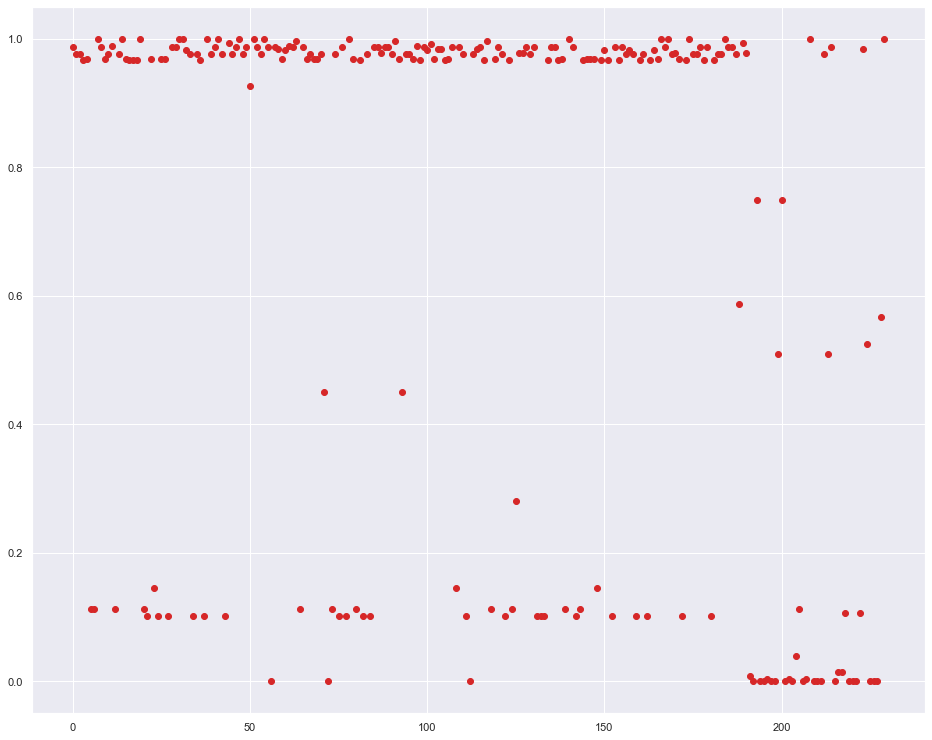

In [17]:
#Графическое представление информативности признаков
plt.figure(figsize=(16,13))
plot_dataset = full_dataset.drop('target', axis=1)
plt.scatter(x = range(plot_dataset.shape[1]), y = plot_dataset.isnull().sum()/plot_dataset.shape[0], color='tab:red')
print(plot_dataset.shape)

In [18]:
# Определение попарной связи каждого категориального признака и набора выходных значений с помощю коэффициента V-Крамера
for x in full_dataset.select_dtypes(include='O').columns:     
    data_pairs = pd.concat([full_dataset[x], target_values], axis=1)
    expect_table = stats.chi2_contingency(pd.crosstab(data_pairs[x], data_pairs['target']))[3]
    table = pd.crosstab(data_pairs[x], data_pairs['target'])
    #print(data_pairs)
    #print(expect_table)
    #print(table)
    if table.shape == (2, 2):
        if (expect_table < 5).any():
            print(f"Таблица 2х2, признак {x} не подошел, количество значений признака {full_dataset[x].notnull().sum(), full_dataset[x].nunique()}")           
    elif (expect_table < 5).sum() > (table.size/5):
            print(f'Многомерная таблица сопряженности, признак {x} не подошел, количество значений признака {full_dataset[x].notnull().sum(), full_dataset[x].nunique()}')
    else:
        print(x, full_dataset[x].notnull().sum(), full_dataset[x].nunique())
    

Var191 322 1
Многомерная таблица сопряженности, признак Var192 не подошел, количество значений признака (14884, 314)
Многомерная таблица сопряженности, признак Var193 не подошел, количество значений признака (15000, 43)
Многомерная таблица сопряженности, признак Var194 не подошел, количество значений признака (3759, 3)
Многомерная таблица сопряженности, признак Var195 не подошел, количество значений признака (15000, 21)
Многомерная таблица сопряженности, признак Var196 не подошел, количество значений признака (15000, 4)
Многомерная таблица сопряженности, признак Var197 не подошел, количество значений признака (14949, 193)
Многомерная таблица сопряженности, признак Var198 не подошел, количество значений признака (15000, 2440)
Многомерная таблица сопряженности, признак Var199 не подошел, количество значений признака (14998, 2262)
Многомерная таблица сопряженности, признак Var200 не подошел, количество значений признака (7353, 6179)
Таблица 2х2, признак Var201 не подошел, количество значе

In [19]:
full_dataset = full_dataset.drop('target', axis=1)

# L_1 = Lasso(alpha=0.25)
# categ_feat = full_dataset.columns[190:]

# #print(categ_feat)
# numerical_dataset = full_dataset.drop(categ_feat, axis=1)
# numerical_dataset = numerical_dataset.fillna(0)

# L_1.fit(numerical_dataset, target_values)
# print(L_1.coef_)
# print(L_1.coef_.shape)
# print('intercept = ', L_1.intercept_)

In [20]:
best_features = []

In [21]:
# корреляция вещественных признаков
numerical_correlation = pd.Series(index = full_dataset.select_dtypes(exclude='O').columns)
i = 0

for x in full_dataset.select_dtypes(exclude='O').columns:    
    if (full_dataset[x].dropna().nunique() != 1) and (len(full_dataset[x].dropna()) != 0):        
        pair_df = pd.concat([full_dataset[x], target_values], axis = 1)
        pair_df[x] = (pair_df[x] - pair_df[x].mean())/pair_df[x].std()
        numerical_correlation[x] = pair_df[pair_df['target'] == -1][x].mean() - pair_df[pair_df['target'] == 1][x].mean()
        
        if np.abs(numerical_correlation[x]) > 0.5:
            print(x, numerical_correlation[x])
            best_features.append(x)
            i += 1
print(i)

Var19 -0.5354307666086634
Var139 -0.706144952378682
Var150 -0.6689178343996524
Var154 -0.5416687005028674
Var177 -0.654493181360894
Var184 -0.8466712756970735
Var189 0.5421139900859194
7


In [28]:
# корреляция v-крамера категориальных признаков
v_cramer_correlation = pd.Series(index = full_dataset.select_dtypes(include='O').columns)
i = 0

for x in full_dataset.select_dtypes(include='O').columns:    
    if len(full_dataset[x].dropna().unique()) > 1:        
        pair_df = pd.concat([full_dataset[x], target_values], axis = 1)
        stat_chi2, p_value, a, b = stats.chi2_contingency(pd.crosstab(pair_df[x], pair_df['target']))
        
        if p_value > 0.05:
            v_cramer_correlation[x] = np.sqrt(stat_chi2/(pair_df.shape[0]-1)*1)
            print(x, v_cramer_correlation[x])
            best_features.append(x)
            i += 1
print(i)

Var194 0.013638568388278339
Var196 0.022579415822588066
Var197 0.10885637073352288
Var198 0.39312053772434485
Var200 0.6459657653622951
Var201 0.013832770446075612
Var202 0.5248899915287919
Var203 0.01787696168642996
Var204 0.07997606957125335
Var208 0.0142183982336697
Var214 0.6459657653622951
Var216 0.27617524065190313
Var217 0.6650592273865419
Var219 0.033939764274384596
Var220 0.3931205377243448
Var222 0.3931205377243448
Var223 0.01457635574835482
Var226 0.04509601495929221
Var229 0.012239759879607702
19


In [23]:
#Разделение отобранных наименований вещественных и категориальных прзнаков на 2 группы
num_features = list(full_dataset.columns[:190])
cat_features = list(full_dataset.columns[190:])

def prepare_dataset(features, dataset):
    prd_data = dataset[features].copy()
    num_feats = [feat for feat in features if feat in num_features]
    cat_feats = [feat for feat in features if feat in cat_features]
    return prd_data, num_feats, cat_feats

#Разделение вещественных и категориальных прзнаков на 2 группы
df, numerical_features, categorical_features = prepare_dataset(best_features, full_dataset.iloc[:10000, :])
target = target_values[:10000].apply(lambda x: 0 if x == -1 else 1)

# веществ признаки нормализуем, заполняя пропуски средним 
numerical_update = pipeline.Pipeline(steps = [
    ('imputer', impute.SimpleImputer(strategy = 'mean')),
    ('scaler', preprocessing.MinMaxScaler())])

# категориальные признаки запоплняем новыми значениями
categorial_update = pipeline.Pipeline(steps = [
    ('imputer', impute.SimpleImputer(strategy = 'constant', fill_value = 'n/a')),
    ('onehot', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))])

preprocessor = compose.ColumnTransformer(
    transformers = [
        ('num', numerical_update, numerical_features),
        ('cat', categorial_update, categorical_features)])

def cv_baselines_model(model):
    estimator = pipeline.Pipeline(steps = [('preprocessor', preprocessor), ('classifier', model)])
    model_results = cross_validate(estimator, df.iloc[:10000, :], target, scoring = scoring, cv = cv)
    for metric in list(model_results.keys())[2:]:    
        print(f'{metric[5:]}: {model_results[metric]}')       
    return model_results

def add_res_inTable(table, res_dict, name_model, named = False):
    res = [res_dict[x].mean() for x in list(res_dict.keys())[2:]]
    table[name_model] = res 
    if named: table.index = list(res_dict.keys())[2:]
        
#Составление таблицы результатов
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision']
proba = pd.DataFrame()
res_baselines = pd.DataFrame()

In [24]:
#Бинарное дерево решений
DTC = DecisionTreeClassifier(criterion='entropy', max_depth=8)
add_res_inTable(proba, cv_baselines_model(DTC), 'Decision Tree')



accuracy: [0.9215 0.9215 0.9215 0.922  0.9205]
precision: [0.2        0.14285714 0.22222222 0.25       0.11111111]
recall: [0.01324503 0.00657895 0.01315789 0.01315789 0.00657895]
f1: [0.02484472 0.01257862 0.02484472 0.025      0.01242236]
roc_auc: [0.61227118 0.54957707 0.61184033 0.58604786 0.62704524]
average_precision: [0.11138811 0.08733384 0.11598148 0.10945199 0.10824196]


In [25]:
#Метод опорных векторов
SVM = svm.SVC(C = 1,kernel='rbf')
add_res_inTable(proba, cv_baselines_model(SVM), 'Support Vector Machines')

accuracy: [0.9245 0.924  0.924  0.924  0.924 ]
precision: [0. 0. 0. 0. 0.]
recall: [0. 0. 0. 0. 0.]
f1: [0. 0. 0. 0. 0.]
roc_auc: [0.58184664 0.58337961 0.56641248 0.58665129 0.56304469]
average_precision: [0.11458739 0.11550896 0.09719568 0.10891137 0.10889974]


In [26]:
#Логистическая регрессия
LR = LogisticRegression(penalty='l2', random_state=0)
add_res_inTable(proba, cv_baselines_model(LR), 'Logistic Regression')

accuracy: [0.923  0.9215 0.9205 0.922  0.92  ]
precision: [0.28571429 0.27272727 0.         0.25       0.21428571]
recall: [0.01324503 0.01973684 0.         0.01315789 0.01973684]
f1: [0.02531646 0.03680982 0.         0.025      0.03614458]
roc_auc: [0.59094051 0.60635609 0.59143954 0.60686873 0.60401359]
average_precision: [0.12235947 0.11371936 0.10216885 0.11253255 0.12039634]


In [27]:
#Результаты классификации на тестируемых данных
proba.index = scoring
proba

,Decision Tree,Support Vector Machines,Logistic Regression
accuracy,0.921400,0.924100,0.921400
precision,0.185238,0.000000,0.204545
recall,0.010544,0.000000,0.013175
f1,0.019938,0.000000,0.024654
roc_auc,0.597356,0.576267,0.599924
average_precision,0.106479,0.109021,0.114235
